<a href="https://colab.research.google.com/github/Tarunkumar1995/Portfolio_DataScience/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
from google.colab import files
file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 61% 25.0M/41.0M [00:00<00:00, 49.6MB/s]
100% 41.0M/41.0M [00:00<00:00, 83.5MB/s]


In [ ]:
!unzip "/content/fake-and-real-news-dataset.zip" -d "/My Drive/"

Archive:  /content/fake-and-real-news-dataset.zip
  inflating: /My Drive/Fake.csv      
  inflating: /My Drive/True.csv      


In [ ]:
import pandas as pd

In [ ]:
df_fake=pd.read_csv('/My Drive/Fake.csv')
df_true=pd.read_csv('/My Drive/True.csv')

In [ ]:
df_fake.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [ ]:
df_true.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [ ]:
df_fake['Target']=1
df_true['Target']=0
df=pd.concat([df_fake,df_true])

In [ ]:
df.head()

title  ... Target
0   Donald Trump Sends Out Embarrassing New Year’...  ...      1
1   Drunk Bragging Trump Staffer Started Russian ...  ...      1
2   Sheriff David Clarke Becomes An Internet Joke...  ...      1
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...      1
4   Pope Francis Just Called Out Donald Trump Dur...  ...      1

[5 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

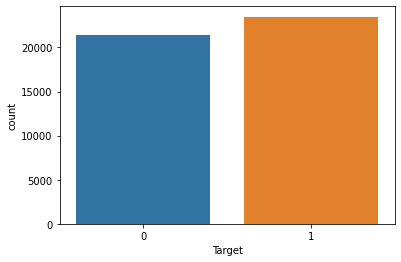

In [ ]:
sns.countplot(df['Target'])
plt.show()

In [ ]:
#remove urls
pattern='https'
filter=df['date'].str.contains(pattern)

In [ ]:
filter.value_counts()

False    44889
True         9
Name: date, dtype: int64

In [ ]:
df=df[~filter]

In [ ]:
pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['date'].str.contains(pattern)

In [ ]:
filter2.value_counts()

True     44888
False        1
Name: date, dtype: int64

In [ ]:
df=df[filter2]

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.head()

title  ... Target
0   Donald Trump Sends Out Embarrassing New Year’...  ...      1
1   Drunk Bragging Trump Staffer Started Russian ...  ...      1
2   Sheriff David Clarke Becomes An Internet Joke...  ...      1
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...      1
4   Pope Francis Just Called Out Donald Trump Dur...  ...      1

[5 rows x 5 columns]

In [ ]:
# df['subject'].value_counts()

In [ ]:
for key,count in df['subject'].value_counts().iteritems():
  print(f"{key}: \t{count}")
print(f"Total : \t {df.shape[0]}")

politicsNews: 	11272
worldnews: 	10145
News: 	9050
politics: 	6836
left-news: 	4456
Government News: 	1568
US_News: 	783
Middle-east: 	778
Total : 	 44888


In [ ]:
df_sub=df.groupby(['subject','Target'])['text'].count()
df_sub

subject          Target
Government News  1          1568
Middle-east      1           778
News             1          9050
US_News          1           783
left-news        1          4456
politics         1          6836
politicsNews     0         11272
worldnews        0         10145
Name: text, dtype: int64

In [ ]:
df_sub=df_sub.unstack().fillna(0)
df_sub

Target                 0       1
subject                         
Government News      0.0  1568.0
Middle-east          0.0   778.0
News                 0.0  9050.0
US_News              0.0   783.0
left-news            0.0  4456.0
politics             0.0  6836.0
politicsNews     11272.0     0.0
worldnews        10145.0     0.0

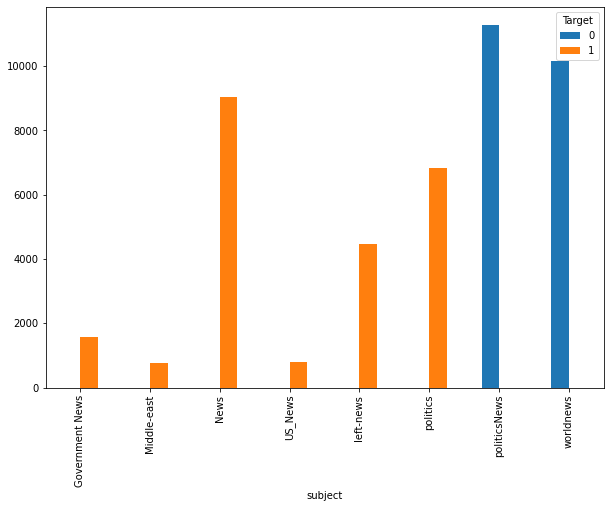

In [ ]:
df_sub.plot(kind='bar',figsize=(10,7));

-  We can see there is only true news in PoliticalNews and WorldNews.


In [ ]:
df_sub['count']=df_sub[0]+df_sub[1]

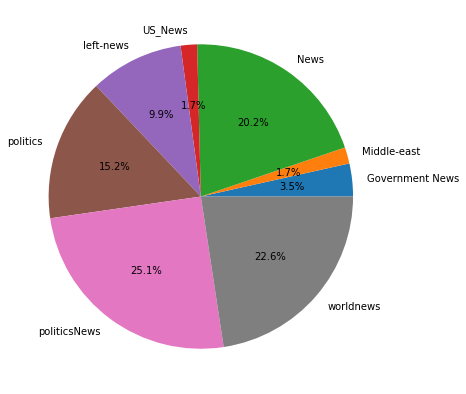

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df_sub['count'],labels=df_sub.index,autopct='%1.1f%%',);

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy_0=df_copy[df_copy['Target']==0]
df_copy_0=df_copy_0.groupby(['date'])['Target'].count()
df_copy_0

date
2016-01-13    30
2016-01-14    15
2016-01-15    23
2016-01-16     5
2016-01-17     3
              ..
2017-12-27    63
2017-12-28     5
2017-12-29     6
2017-12-30     1
2017-12-31     2
Name: Target, Length: 716, dtype: int64

In [ ]:
df_copy_1=df_copy[df_copy['Target']==1]
df_copy_1=df_copy_1.groupby(['date'])['Target'].count()
df_copy_1

date
2015-03-31     8
2015-04-01     2
2015-04-02     1
2015-04-04     5
2015-04-05    13
              ..
2018-02-15     9
2018-02-16     8
2018-02-17     7
2018-02-18     7
2018-02-19     3
Name: Target, Length: 1010, dtype: int64

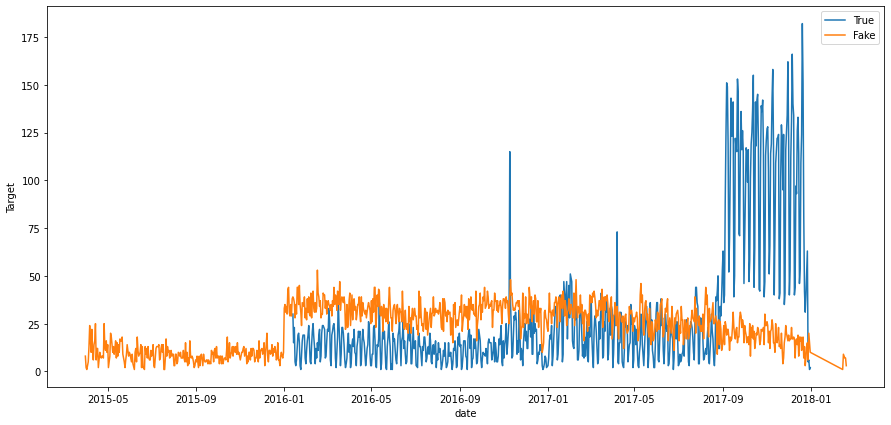

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(df_copy_0.index,df_copy_0,label='True')
plt.plot(df_copy_1,label='Fake')
plt.legend()
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from wordcloud import WordCloud

***WordCloud for Fake News***

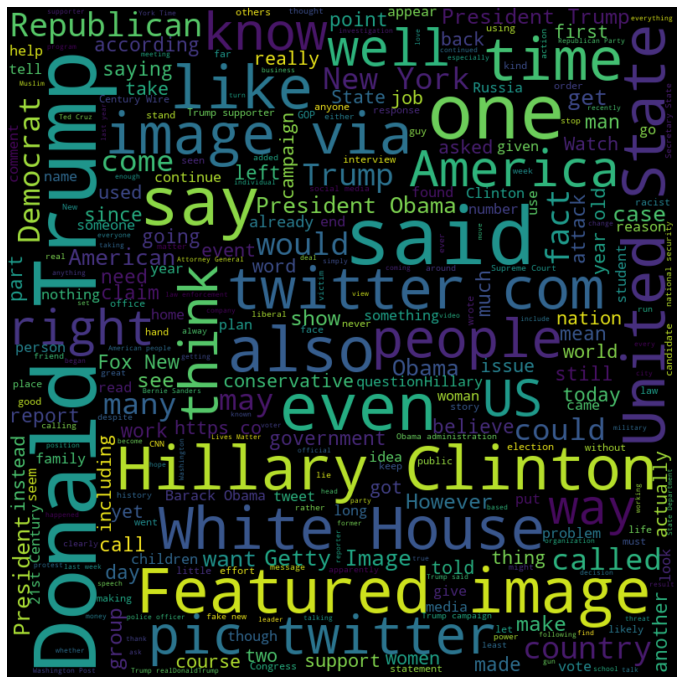

In [ ]:
text=''
for news in df_fake.text.values:
  text +=f" {news}"
wordcloud=WordCloud(width=800,height=800,max_words=300,background_color='black',stopwords=set(nltk.corpus.stopwords.words('english'))).generate(text)
  
plt.figure(figsize=(12,25))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

***Word Cloud for True News***

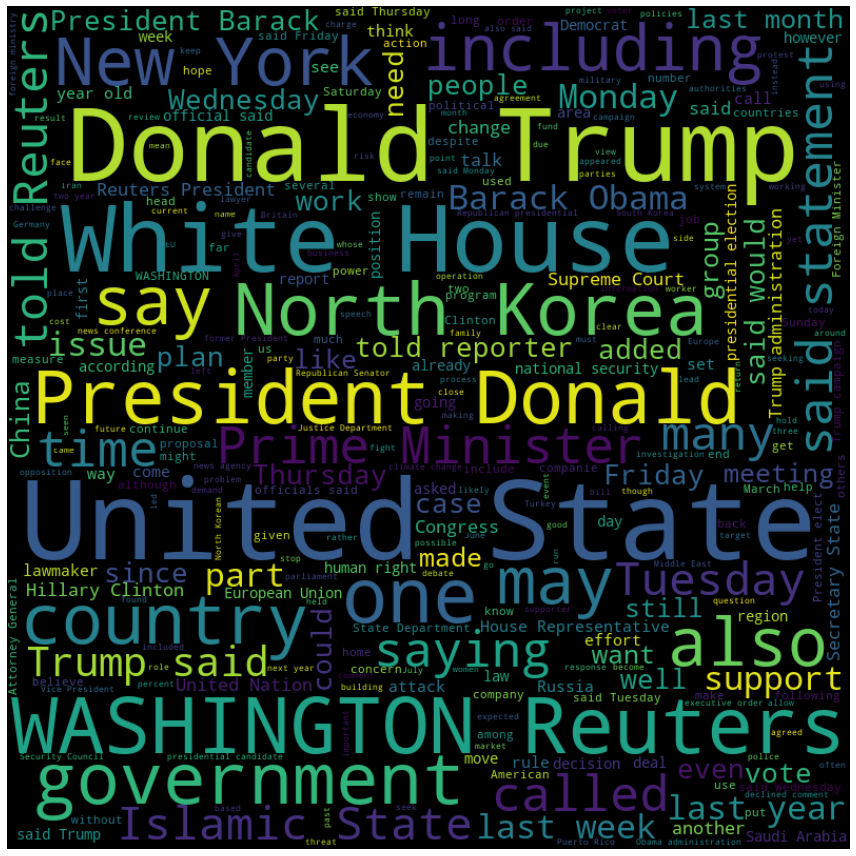

In [ ]:
text=''
for words in df_true.text.values:
  text += f" {words}"
wordcloud=WordCloud(width=800,height=800,max_words=300,stopwords=set(nltk.corpus.stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

***Combining Title text and subject***

In [ ]:
df_copy['news']=df_copy['title']+ " "+ df_copy['text']+ " "+df_copy['subject']

In [ ]:
del df_copy['title']
del df_copy['text']
del df_copy['subject']
del df_copy['date']

In [ ]:
df_copy.head()

Target                                               news
0       1   Donald Trump Sends Out Embarrassing New Year’...
1       1   Drunk Bragging Trump Staffer Started Russian ...
2       1   Sheriff David Clarke Becomes An Internet Joke...
3       1   Trump Is So Obsessed He Even Has Obama’s Name...
4       1   Pope Francis Just Called Out Donald Trump Dur...

In [ ]:
def cleantext(text):
  
  text=text.lower()
  text=re.sub(r'[^a-zA-Z0-9_]',' ',text)
  text=nltk.word_tokenize(text)
  text=[word for word in text if word not in set(nltk.corpus.stopwords.words('english')) and len(word) > 1]
  
  return ' '.join(text)


In [ ]:
df_copy['cleanedtext'] = df_copy['news'].apply(lambda x: cleantext(x))

In [ ]:
df_copy.head()

Target  ...                                        cleanedtext
0       1  ...  donald trump sends embarrassing new year eve m...
1       1  ...  drunk bragging trump staffer started russian c...
2       1  ...  sheriff david clarke becomes internet joke thr...
3       1  ...  trump obsessed even obama name coded website i...
4       1  ...  pope francis called donald trump christmas spe...

[5 rows x 3 columns]

In [ ]:
df_copy['news'].apply(lambda x : len(x))

0        2978
1        1973
2        3693
3        2858
4        2422
         ... 
21412    2893
21413     863
21414    2010
21415    1271
21416    1401
Name: news, Length: 44888, dtype: int64

In [ ]:
df_copy['cleanedtext'].apply(lambda x : len(x))

0        2057
1        1451
2        2606
3        2047
4        1520
         ... 
21412    2033
21413     649
21414    1397
21415     918
21416    1111
Name: cleanedtext, Length: 44888, dtype: int64

In [ ]:
df_copy.head()

Target  ...                                        cleanedtext
0       1  ...  donald trump sends embarrassing new year eve m...
1       1  ...  drunk bragging trump staffer started russian c...
2       1  ...  sheriff david clarke becomes internet joke thr...
3       1  ...  trump obsessed even obama name coded website i...
4       1  ...  pope francis called donald trump christmas spe...

[5 rows x 3 columns]

In [ ]:
all_news=pd.DataFrame(pd.Series(' '.join(df_copy['cleanedtext']).split()).value_counts())

In [ ]:
#top 30 frequently repeated words
all_news=all_news.head(30)

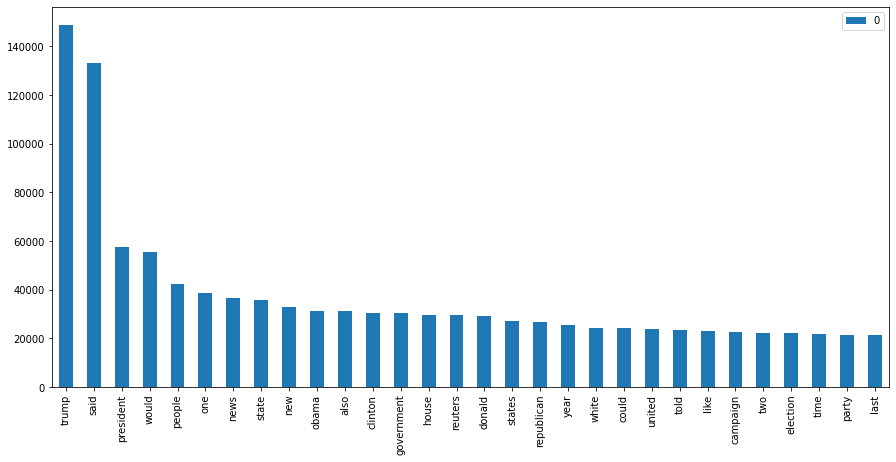

In [ ]:
all_news.plot(kind='bar',figsize=(15,7));


In [ ]:
fakes_news=pd.DataFrame(pd.Series(' '.join(df_copy[df_copy['Target']==1]['cleanedtext']).split()).value_counts())

In [ ]:
fake_news=fakes_news[:30]
fake_news

0
trump       88636
said        33957
news        30576
president   28861
people      27085
one         25164
would       23823
obama       21377
clinton     20311
donald      18519
like        18491
video       16811
hillary     16439
also        15429
new         15299
us          15287
even        14201
time        14147
white       14064
state       13921
via         12791
media       12406
twitter     12105
america     11886
american    11740
house       11665
campaign    11573
get         11214
right       11186
government  10982

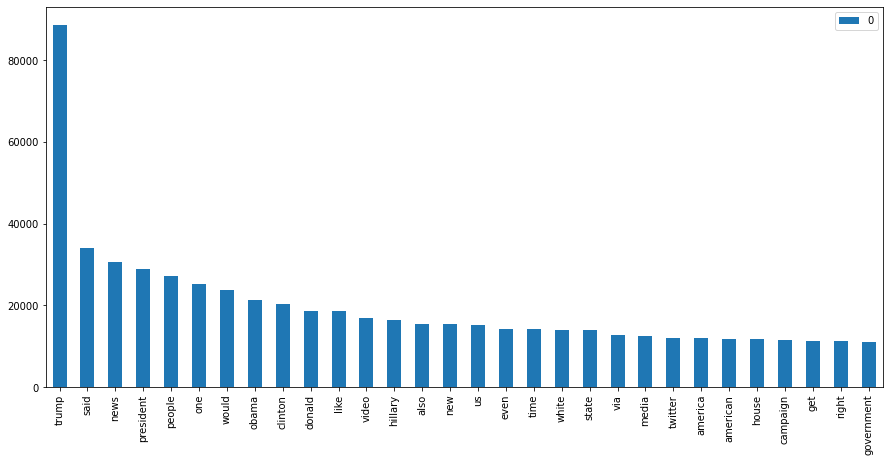

In [ ]:
fake_news.plot(kind='bar',figsize=(15,7));

In [ ]:
real_news=pd.DataFrame(pd.Series(' '.join(df_copy[df_copy['Target']==0]['cleanedtext']).split()).value_counts())

In [ ]:
real_news=real_news[:30]

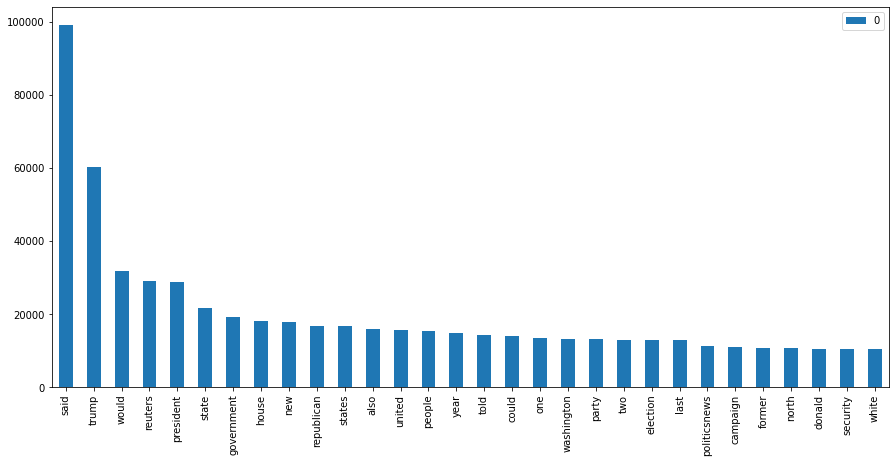

In [ ]:
real_news.plot(kind='bar',figsize=(15,7));

In [ ]:
X=[]
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df_copy['news'].values:
  tmp=[]
  sentences=nltk.sent_tokenize(par)
  
  for sent in sentences:
    sent=sent.lower()
    sent=tokenizer.tokenize(sent)
   
    filtered_sent=[word.strip() for word in sent if word not in set(nltk.corpus.stopwords.words('english')) and len(word) >1 ]
    tmp.extend(filtered_sent)

  X.append(tmp)



In [ ]:
y=df_copy['Target'].values

In [ ]:
type(X)

list

In [ ]:
len(X)

44888

In [ ]:
import gensim

In [ ]:
Embedding_dim=100
w2vmodel=gensim.models.Word2Vec(sentences=X,size=Embedding_dim,window=5,min_count=1)  #here min count is repetation of the word 

In [ ]:
len(w2vmodel.wv.vocab)
#We have now represented each of 122248 words by a 100dim vector.

122351

In [ ]:
w2vmodel['corona']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.03522803, -0.06533799, -0.01695889, -0.00267663,  0.00140648,
        0.03767525,  0.0145256 ,  0.05649928, -0.01075295, -0.07058547,
       -0.0018979 ,  0.00494555,  0.03535007, -0.03371946,  0.01477289,
       -0.09581444, -0.01687069,  0.07395782,  0.05415881, -0.01301385,
        0.01194781,  0.0531968 ,  0.03272195, -0.03631413, -0.02672609,
       -0.017615  ,  0.01165806,  0.04243206,  0.0435993 ,  0.04738836,
       -0.04426571, -0.02581693, -0.04342813, -0.02940021, -0.01237126,
        0.01855581,  0.03365165, -0.03516006, -0.017992  , -0.02565546,
       -0.04376008,  0.04876835,  0.02979502, -0.020694  ,  0.04064535,
       -0.03189667, -0.01221277,  0.02613619,  0.05737775,  0.04112853,
       -0.0611935 ,  0.03674563, -0.02867763,  0.04961969, -0.06475057,
        0.02599427,  0.03037727,  0.04167917,  0.03391928,  0.07564627,
        0.03777386,  0.01277394,  0.04255453, -0.00671786, -0.05146511,
        0.00410429,  0.0532561 , -0.03617165,  0.00169692, -0.02

In [ ]:
w2vmodel['trump']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.30798864, -0.24243017, -0.85595274, -2.8042896 ,  1.4733108 ,
       -0.43022308,  1.442094  ,  1.3976139 , -2.7684207 , -1.4207609 ,
        2.7435496 ,  0.29576716,  1.0146687 , -3.5043223 ,  1.7968798 ,
        1.3639522 , -2.122545  , -0.14832672, -0.882558  , -0.49656406,
       -0.98275137,  0.13369314, -1.9214467 ,  0.9428275 , -0.6511398 ,
       -0.58870876, -0.86136115,  0.76989025, -2.520513  , -0.36857706,
       -1.8081636 , -0.7100575 ,  0.06272168, -1.4550669 ,  2.7872434 ,
        0.37288684, -0.71394616, -0.09215521, -0.76088303, -0.30187786,
        1.2513075 ,  1.1300131 , -0.7772517 ,  0.9523876 , -0.98285663,
        0.20327947,  0.7131021 ,  0.22226368, -1.2619377 ,  2.149356  ,
        0.05532795, -1.662215  , -1.0382326 ,  0.9367513 ,  1.3829747 ,
        2.2150555 ,  0.35073057,  2.287731  ,  1.4293181 ,  1.216976  ,
       -2.0982888 ,  1.5416677 ,  0.8466924 , -0.06087416,  0.16021873,
       -1.5034115 ,  1.8079628 , -0.44368133, -1.4063295 ,  1.09

In [ ]:
w2vmodel.wv.most_similar('iran')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tehran', 0.8725149631500244),
 ('iranian', 0.7460730075836182),
 ('hezbollah', 0.6229569911956787),
 ('iranians', 0.6184175610542297),
 ('destabilizing', 0.596961259841919),
 ('riyadh', 0.5903533101081848),
 ('zehn1epex7', 0.5744248628616333),
 ('pyongyang', 0.5737410187721252),
 ('rouhani', 0.5730733871459961),
 ('nuclear', 0.5718399286270142)]

In [ ]:
w2vmodel.wv.most_similar('trump')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('elect', 0.6420115232467651),
 ('kdmtphe7zouif', 0.5304330587387085),
 ('trumpoften', 0.5208150148391724),
 ('cruz', 0.5073713064193726),
 ('obama', 0.5036090612411499),
 ('janeosanders', 0.4940215051174164),
 ('president', 0.48933276534080505),
 ('conway', 0.4622619152069092),
 ('40mm', 0.46167364716529846),
 ('clinton', 0.45543932914733887)]

In [ ]:
w2vmodel.wv.most_similar('america')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nation', 0.7179099917411804),
 ('country', 0.6709705591201782),
 ('american', 0.6039490103721619),
 ('us', 0.5668267011642456),
 ('planet', 0.525023341178894),
 ('truly', 0.5066471099853516),
 ('africa', 0.48833417892456055),
 ('americans', 0.48498135805130005),
 ('minds', 0.4817844331264496),
 ('world', 0.4710800051689148)]

In [ ]:
w2vmodel.wv.most_similar('facebook')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('instagram', 0.65547114610672),
 ('reddit', 0.6546205878257751),
 ('gofundme', 0.6534816026687622),
 ('google', 0.6147226095199585),
 ('fb', 0.600375771522522),
 ('snapchat', 0.5910431146621704),
 ('website', 0.5855759978294373),
 ('online', 0.5768195986747742),
 ('arirangmeari', 0.5690597295761108),
 ('4chan', 0.5625214576721191)]

In [ ]:
w2vmodel.wv.most_similar(positive=['trump','obama','clinton'],)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('incoming', 0.5405738949775696),
 ('elect', 0.5313129425048828),
 ('bush', 0.5208019018173218),
 ('cruz', 0.49997422099113464),
 ('bartlet', 0.4946010112762451),
 ('hillary', 0.46680429577827454),
 ('crooked', 0.44175106287002563),
 ('outright', 0.43872472643852234),
 ('sanders', 0.43608179688453674),
 ('however', 0.43389779329299927)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:

tokenizer = Tokenizer()  #converts the text into a tokens
tokenizer.fit_on_texts(X)  #it creates a voculabary index



In [ ]:
type(X)

list

In [ ]:
tokenizer.index_word

{1: 'trump',
 2: 'said',
 3: 'president',
 4: 'would',
 5: 'people',
 6: 'one',
 7: 'news',
 8: 'state',
 9: 'new',
 10: 'obama',
 11: 'also',
 12: 'clinton',
 13: 'government',
 14: 'house',
 15: 'reuters',
 16: 'donald',
 17: 'states',
 18: 'republican',
 19: 'year',
 20: 'white',
 21: 'could',
 22: 'united',
 23: 'told',
 24: 'like',
 25: 'campaign',
 26: 'two',
 27: 'election',
 28: 'time',
 29: 'party',
 30: 'last',
 31: 'first',
 32: 'hillary',
 33: 'washington',
 34: 'former',
 35: 'country',
 36: 'even',
 37: 'us',
 38: 'video',
 39: 'media',
 40: 'years',
 41: 'many',
 42: 'american',
 43: 'security',
 44: 'law',
 45: 'may',
 46: 'police',
 47: 'court',
 48: 'say',
 49: 'made',
 50: 'national',
 51: 'political',
 52: 'get',
 53: 'russia',
 54: 'right',
 55: 'make',
 56: 'republicans',
 57: 'twitter',
 58: 'since',
 59: 'bill',
 60: 'percent',
 61: 'back',
 62: 'going',
 63: 'america',
 64: 'administration',
 65: 'according',
 66: 'presidential',
 67: 'says',
 68: 'senate',
 69

In [ ]:

X=tokenizer.texts_to_sequences(X)
#text_to_seq converts the texts into integers based on the wordindex

In [ ]:
X[5]

[491,
 1464,
 1795,
 25557,
 126,
 1730,
 10839,
 3470,
 381,
 270,
 722,
 1795,
 36870,
 1066,
 5,
 2179,
 716,
 101,
 161,
 110,
 141,
 543,
 1519,
 177,
 2036,
 1464,
 314,
 461,
 2269,
 2560,
 1519,
 3470,
 878,
 649,
 1373,
 1402,
 3690,
 4719,
 8728,
 344,
 401,
 543,
 1519,
 177,
 2036,
 3444,
 1875,
 2560,
 649,
 46,
 2628,
 1676,
 12185,
 3850,
 1266,
 101,
 878,
 2659,
 742,
 263,
 1795,
 1521,
 2037,
 25557,
 2628,
 183,
 101,
 2588,
 2560,
 10523,
 588,
 1795,
 1075,
 4027,
 3785,
 649,
 80,
 79,
 660,
 9718,
 19382,
 1561,
 305,
 1240,
 3943,
 8036,
 1075,
 2825,
 2249,
 730,
 2682,
 3785,
 1585,
 21,
 36,
 831,
 1905,
 1212,
 225,
 1334,
 483,
 143,
 150,
 176,
 23684,
 13908,
 1464,
 10926,
 644,
 2253,
 1537,
 2269,
 2560,
 649,
 263,
 4454,
 648,
 483,
 143,
 251,
 1009,
 3444,
 1795,
 142,
 20822,
 1445,
 134,
 134,
 28,
 10050,
 3977,
 52,
 729,
 4034,
 334,
 10117,
 539,
 1947,
 2358,
 42589,
 2433,
 48,
 126,
 431,
 263,
 78,
 1585,
 4,
 628,
 2269,
 2560,
 649,
 2

In [ ]:
X[0][:10]

[16, 1, 4832, 2615, 9, 19, 4418, 529, 2696, 16]

In [ ]:
len(df_copy['news'])

44888

In [ ]:
length=[]
for i in range(0,44888):
  length.append(len(df_copy['news'].values[i]))


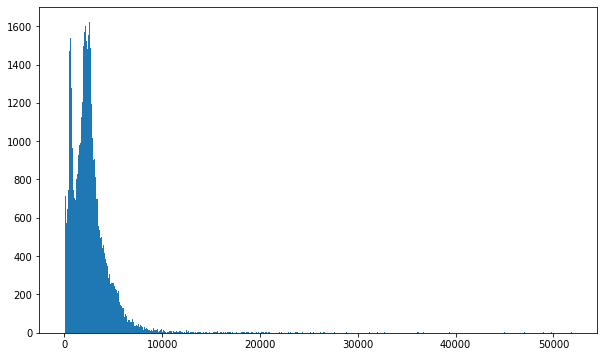

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(length,bins=500);

- we can see most of the lenght of the words ranges in between 600 and 700 .

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_length=700
X=pad_sequences(X,maxlen=max_length)

In [ ]:
len(X[20])

700

In [ ]:
vocab_size=len(tokenizer.word_index) + 1

In [ ]:
vocab_size

122352

In [ ]:
import numpy as np

In [ ]:
word_index=tokenizer.word_index

In [ ]:
word_index.items()

dict_items([('trump', 1), ('said', 2), ('president', 3), ('would', 4), ('people', 5), ('one', 6), ('news', 7), ('state', 8), ('new', 9), ('obama', 10), ('also', 11), ('clinton', 12), ('government', 13), ('house', 14), ('reuters', 15), ('donald', 16), ('states', 17), ('republican', 18), ('year', 19), ('white', 20), ('could', 21), ('united', 22), ('told', 23), ('like', 24), ('campaign', 25), ('two', 26), ('election', 27), ('time', 28), ('party', 29), ('last', 30), ('first', 31), ('hillary', 32), ('washington', 33), ('former', 34), ('country', 35), ('even', 36), ('us', 37), ('video', 38), ('media', 39), ('years', 40), ('many', 41), ('american', 42), ('security', 43), ('law', 44), ('may', 45), ('police', 46), ('court', 47), ('say', 48), ('made', 49), ('national', 50), ('political', 51), ('get', 52), ('russia', 53), ('right', 54), ('make', 55), ('republicans', 56), ('twitter', 57), ('since', 58), ('bill', 59), ('percent', 60), ('back', 61), ('going', 62), ('america', 63), ('administration',

In [ ]:
len(word_index)

122351

In [ ]:
def get_weight_matrix(model,vocab):
  vocab_size=len(vocab) +1  #it starts with 0 so we add 1
  weight_matrix=np.zeros((vocab_size,Embedding_dim))
  for word ,index in vocab.items():
    weight_matrix[index] = model[word]
  return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors=get_weight_matrix(w2vmodel,word_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf


In [ ]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=Embedding_dim,
                    weights=[embedding_vectors],input_length=max_length,trainable=False))
model.add(LSTM(units=64))
model.add(Dense(units=1,activation='sigmoid'))
optimizer=tf.keras.optimizers.Adam()
loss=tf.keras.losses.binary_crossentropy
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 700, 100)          12235200  
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 12,277,505
Trainable params: 42,305
Non-trainable params: 12,235,200
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,stratify=y,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32768, 700)
(12120, 700)
(32768,)
(12120,)


In [ ]:
history=model.fit(X_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
717/717 [==============================] - 222s 309ms/step - loss: 0.0106 - accuracy: 0.9988 - val_loss: 2.6856e-04 - val_accuracy: 1.0000
Epoch 2/5
717/717 [==============================] - 222s 310ms/step - loss: 1.4546e-04 - accuracy: 1.0000 - val_loss: 7.7971e-05 - val_accuracy: 1.0000
Epoch 3/5
717/717 [==============================] - 220s 307ms/step - loss: 5.5469e-05 - accuracy: 1.0000 - val_loss: 3.7801e-05 - val_accuracy: 1.0000
Epoch 4/5
717/717 [==============================] - 221s 308ms/step - loss: 2.8817e-05 - accuracy: 1.0000 - val_loss: 2.2185e-05 - val_accuracy: 1.0000
Epoch 5/5
717/717 [==============================] - 220s 307ms/step - loss: 1.6555e-05 - accuracy: 1.0000 - val_loss: 1.3665e-05 - val_accuracy: 1.0000


In [ ]:
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5783
           1       1.00      1.00      1.00      6337

    accuracy                           1.00     12120
   macro avg       1.00      1.00      1.00     12120
weighted avg       1.00      1.00      1.00     12120

